In [1]:
!pip install pandas_datareader


In [19]:
!pip install -q yfinance


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-08,123.010002,125.629997,122.260002,124.250000,124.250000,62159300,AMAZON
2023-06-09,124.080002,125.800003,123.190002,123.430000,123.430000,51330000,AMAZON
2023-06-12,124.019997,126.779999,123.529999,126.570000,126.570000,51338000,AMAZON
2023-06-13,128.119995,128.410004,125.180000,126.660004,126.660004,50564800,AMAZON
2023-06-14,126.699997,126.949997,124.120003,126.419998,126.419998,52422500,AMAZON
2023-06-15,125.209999,127.690002,124.320000,127.110001,127.110001,60458500,AMAZON
2023-06-16,127.709999,127.900002,125.300003,125.489998,125.489998,84188100,AMAZON
2023-06-20,124.970001,127.250000,124.500000,125.779999,125.779999,56930100,AMAZON
2023-06-21,125.639999,126.730003,123.849998,124.830002,124.830002,52075700,AMAZON


In [21]:
# Summary Stats
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,153.833175,155.706548,152.244048,154.109524,153.660009,7.254175e+07
std,13.918319,13.675624,14.189470,13.967961,14.070176,2.254004e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,4.989619e+06
25%,143.259995,146.525002,141.799995,144.155003,143.736427,5.632832e+07
50%,152.139999,153.770004,150.165001,152.129997,151.562485,6.901730e+07
75%,164.627499,165.960003,163.602497,165.067505,164.702187,8.189302e+07
max,186.729996,186.990005,184.410004,186.009995,186.009995,1.647624e+08


In [22]:
# General info
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-06-22 to 2023-06-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


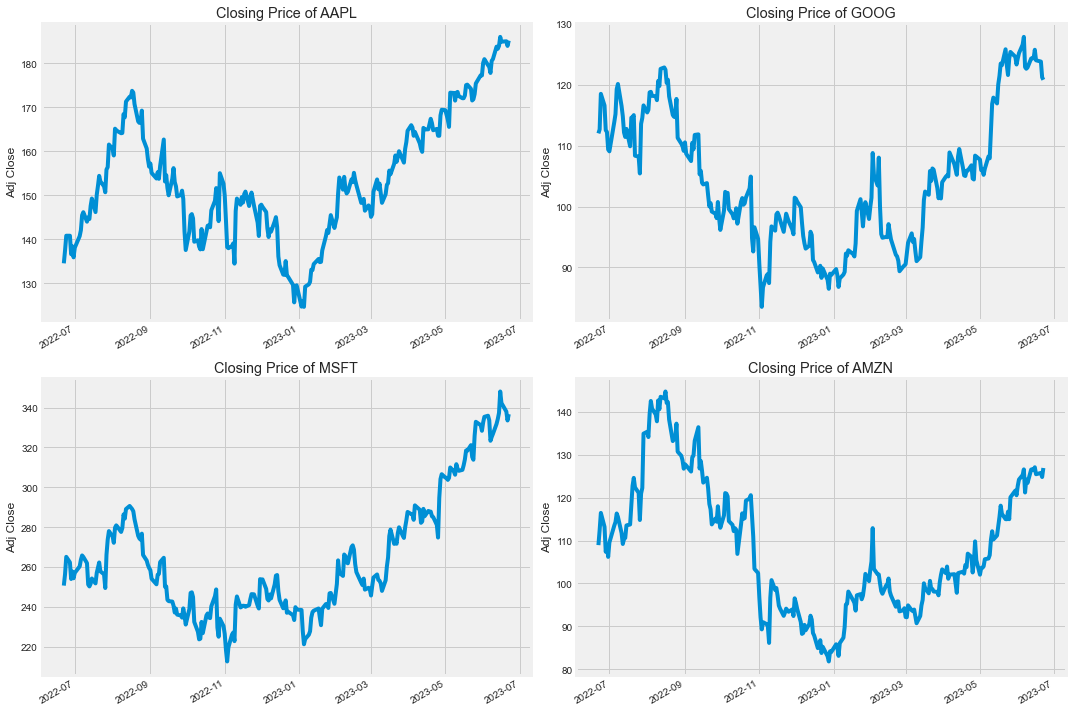

In [23]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


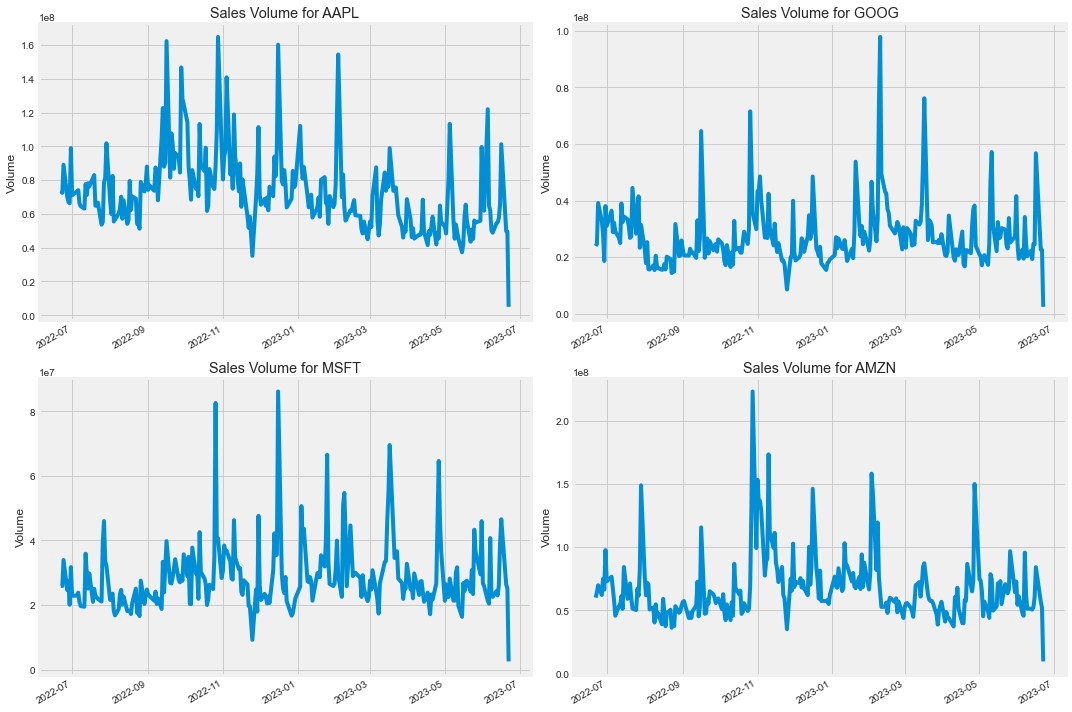

In [24]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()


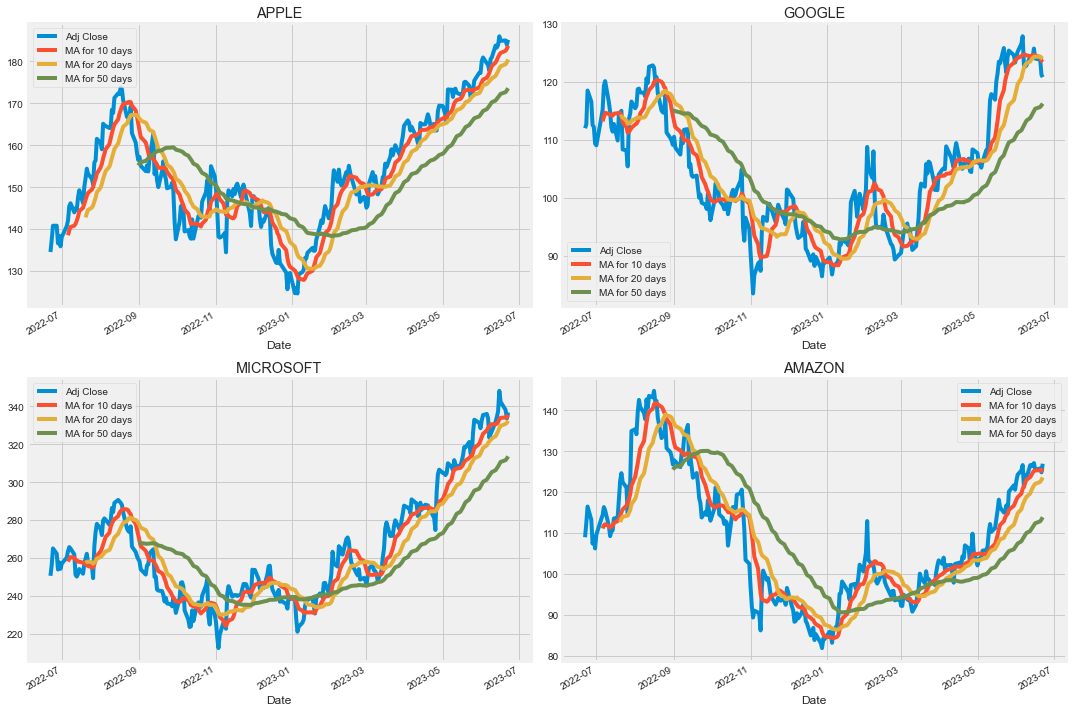

In [26]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


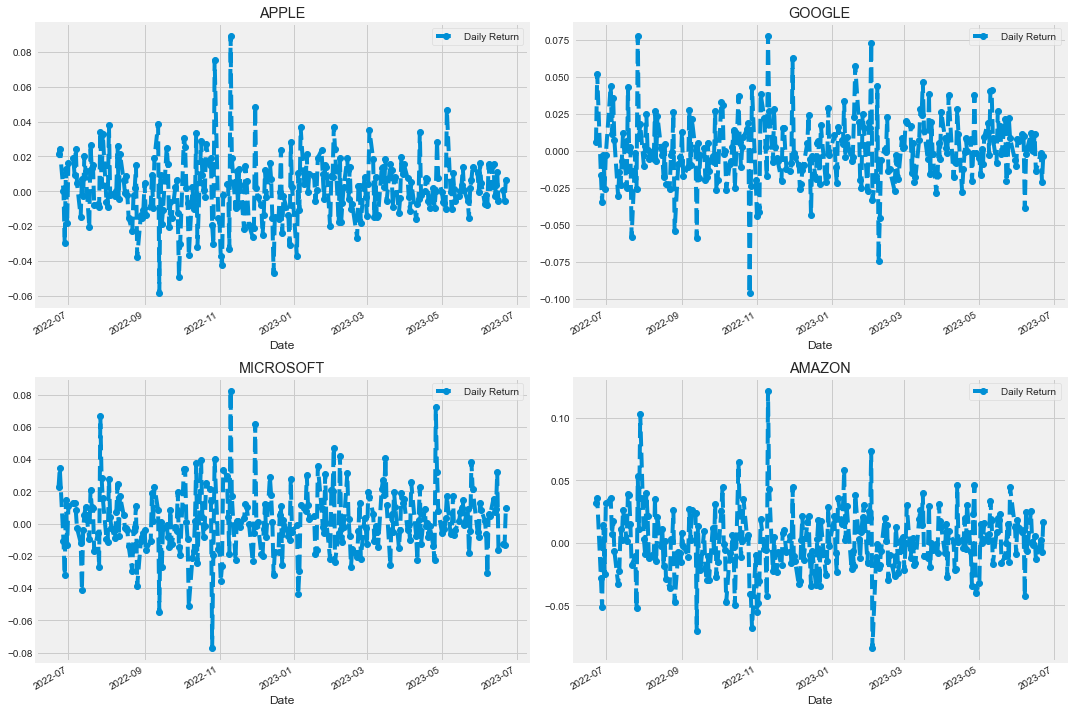

In [27]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


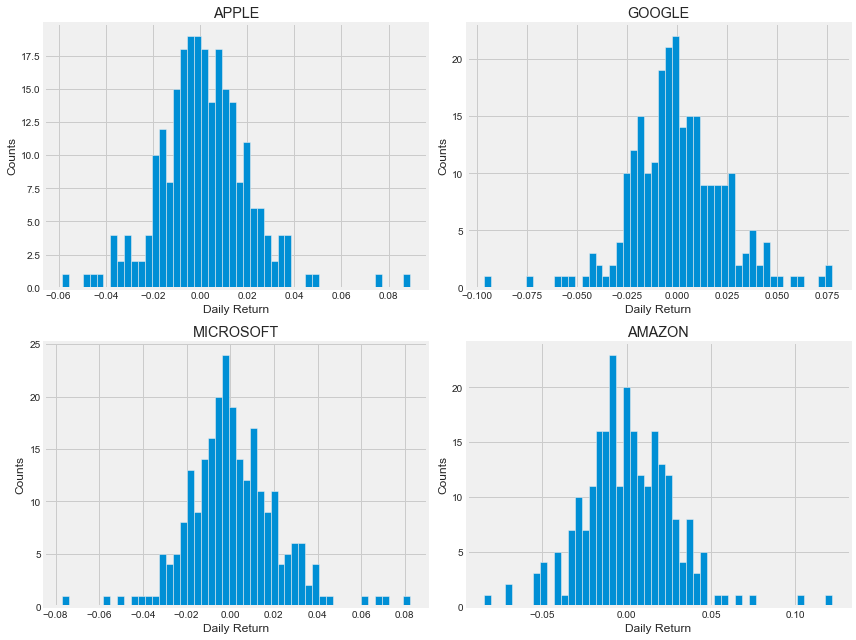

In [28]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [40]:
# I. Which company has the highest revenue?
company_with_highest_revenue = AAPL['Volume'].idxmax()
df


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-22,134.789993,137.759995,133.910004,135.350006,134.546616,73409200,APPLE
2022-06-23,136.820007,138.589996,135.630005,138.270004,137.449265,72433800,APPLE
2022-06-24,139.899994,141.910004,139.770004,141.660004,140.819153,89116800,APPLE
2022-06-27,142.699997,143.490005,140.970001,141.660004,140.819153,70207900,APPLE
2022-06-28,142.130005,143.419998,137.320007,137.440002,136.624176,67083400,APPLE
...,...,...,...,...,...,...,...
2023-06-15,125.209999,127.690002,124.320000,127.110001,127.110001,60458500,AMAZON
2023-06-16,127.709999,127.900002,125.300003,125.489998,125.489998,84188100,AMAZON
2023-06-20,124.970001,127.250000,124.500000,125.779999,125.779999,56930100,AMAZON


In [35]:
# II. Which company has the highest market capitalization?
company_with_highest_market_cap = GOOG['Volume'].idxmax()
df



,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-22,134.789993,137.759995,133.910004,135.350006,134.546616,73409200,APPLE
2022-06-23,136.820007,138.589996,135.630005,138.270004,137.449265,72433800,APPLE
2022-06-24,139.899994,141.910004,139.770004,141.660004,140.819153,89116800,APPLE
2022-06-27,142.699997,143.490005,140.970001,141.660004,140.819153,70207900,APPLE
2022-06-28,142.130005,143.419998,137.320007,137.440002,136.624176,67083400,APPLE
...,...,...,...,...,...,...,...
2023-06-15,125.209999,127.690002,124.320000,127.110001,127.110001,60458500,AMAZON
2023-06-16,127.709999,127.900002,125.300003,125.489998,125.489998,84188100,AMAZON
2023-06-20,124.970001,127.250000,124.500000,125.779999,125.779999,56930100,AMAZON


In [38]:
# III. Which company has the highest earnings per share?
company_with_highest_eps = MSFT['Adj Close'].idxmax()
df


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-22,134.789993,137.759995,133.910004,135.350006,134.546616,73409200,APPLE
2022-06-23,136.820007,138.589996,135.630005,138.270004,137.449265,72433800,APPLE
2022-06-24,139.899994,141.910004,139.770004,141.660004,140.819153,89116800,APPLE
2022-06-27,142.699997,143.490005,140.970001,141.660004,140.819153,70207900,APPLE
2022-06-28,142.130005,143.419998,137.320007,137.440002,136.624176,67083400,APPLE
...,...,...,...,...,...,...,...
2023-06-15,125.209999,127.690002,124.320000,127.110001,127.110001,60458500,AMAZON
2023-06-16,127.709999,127.900002,125.300003,125.489998,125.489998,84188100,AMAZON
2023-06-20,124.970001,127.250000,124.500000,125.779999,125.779999,56930100,AMAZON


In [39]:
# IV. How has the performance of each company changed over time?
company_performance = AMZN['Adj Close'].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-22,134.789993,137.759995,133.910004,135.350006,134.546616,73409200,APPLE
2022-06-23,136.820007,138.589996,135.630005,138.270004,137.449265,72433800,APPLE
2022-06-24,139.899994,141.910004,139.770004,141.660004,140.819153,89116800,APPLE
2022-06-27,142.699997,143.490005,140.970001,141.660004,140.819153,70207900,APPLE
2022-06-28,142.130005,143.419998,137.320007,137.440002,136.624176,67083400,APPLE
...,...,...,...,...,...,...,...
2023-06-15,125.209999,127.690002,124.320000,127.110001,127.110001,60458500,AMAZON
2023-06-16,127.709999,127.900002,125.300003,125.489998,125.489998,84188100,AMAZON
2023-06-20,124.970001,127.250000,124.500000,125.779999,125.779999,56930100,AMAZON


In [42]:
# V. Find the trends in the stock prices of these companies?
company_trends = AAPL['Adj Close'].diff()
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-22,134.789993,137.759995,133.910004,135.350006,134.546616,73409200,APPLE
2022-06-23,136.820007,138.589996,135.630005,138.270004,137.449265,72433800,APPLE
2022-06-24,139.899994,141.910004,139.770004,141.660004,140.819153,89116800,APPLE
2022-06-27,142.699997,143.490005,140.970001,141.660004,140.819153,70207900,APPLE
2022-06-28,142.130005,143.419998,137.320007,137.440002,136.624176,67083400,APPLE
...,...,...,...,...,...,...,...
2023-06-15,125.209999,127.690002,124.320000,127.110001,127.110001,60458500,AMAZON
2023-06-16,127.709999,127.900002,125.300003,125.489998,125.489998,84188100,AMAZON
2023-06-20,124.970001,127.250000,124.500000,125.779999,125.779999,56930100,AMAZON
